In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/train.csv')

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
data=data.drop(['Name'],axis=1)

In [ ]:
data['Age']=data.Age.fillna(data['Age'].median())
data['Cabin']=data.Cabin.fillna('B96')
data['Embarked']=data.Embarked.fillna('S')

In [ ]:
for i in data.select_dtypes(include='float').columns:
  data[i] = data[i].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
le.fit(data['Sex'])
data['Sex']=le.transform(data['Sex'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    int64 
 4   Age          891 non-null    int64 
 5   SibSp        891 non-null    int64 
 6   Parch        891 non-null    int64 
 7   Ticket       891 non-null    object
 8   Fare         891 non-null    int64 
 9   Cabin        891 non-null    object
 10  Embarked     891 non-null    object
dtypes: int64(8), object(3)
memory usage: 76.7+ KB


In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22,1,0,A/5 21171,7,B96,S
1,2,1,1,0,38,1,0,PC 17599,71,C85,C
2,3,1,3,0,26,0,0,STON/O2. 3101282,7,B96,S
3,4,1,1,0,35,1,0,113803,53,C123,S
4,5,0,3,1,35,0,0,373450,8,B96,S
5,6,0,3,1,28,0,0,330877,8,B96,Q
6,7,0,1,1,54,0,0,17463,51,E46,S
7,8,0,3,1,2,3,1,349909,21,B96,S
8,9,1,3,0,27,0,2,347742,11,B96,S
9,10,1,2,0,14,1,0,237736,30,B96,C


In [ ]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681,NaN,148,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347082,NaN,B96,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,687,646
mean,446.000000,0.383838,2.308642,0.647587,29.345679,0.523008,0.381594,NaN,31.785634,NaN,NaN
std,257.353842,0.486592,0.836071,0.477990,13.028212,1.102743,0.806057,NaN,49.703730,NaN,NaN
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,NaN,7.000000,NaN,NaN
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,NaN,14.000000,NaN,NaN
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
import seaborn as sns

<ipython-input-16-566a8b3a47da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['SibSp','Parch','Embarked'],axis=1).corr(),annot=True,vmin=-1,vmax=1)


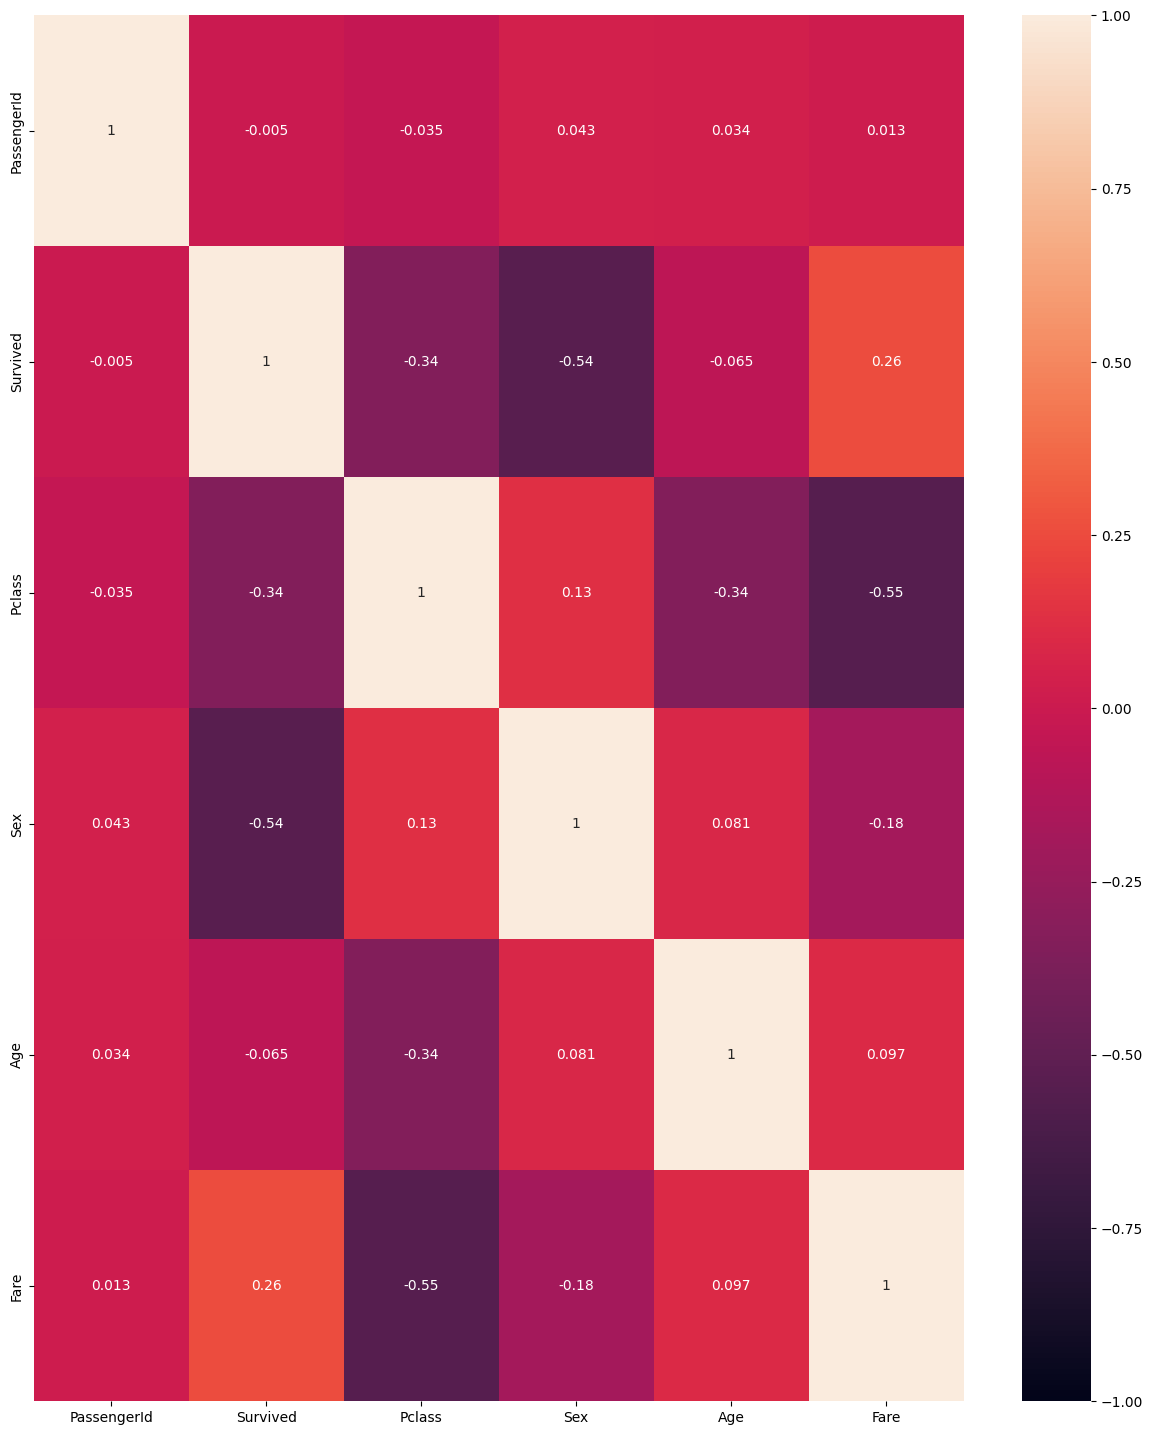

In [ ]:
plt.figure(figsize=(15,18))
sns.heatmap(data.drop(['SibSp','Parch','Embarked'],axis=1).corr(),annot=True,vmin=-1,vmax=1)
plt.show()

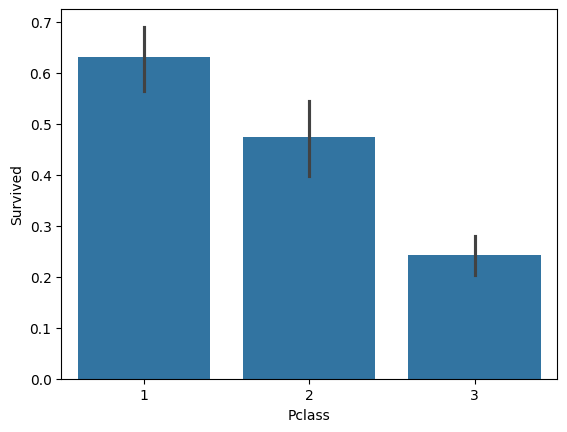

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

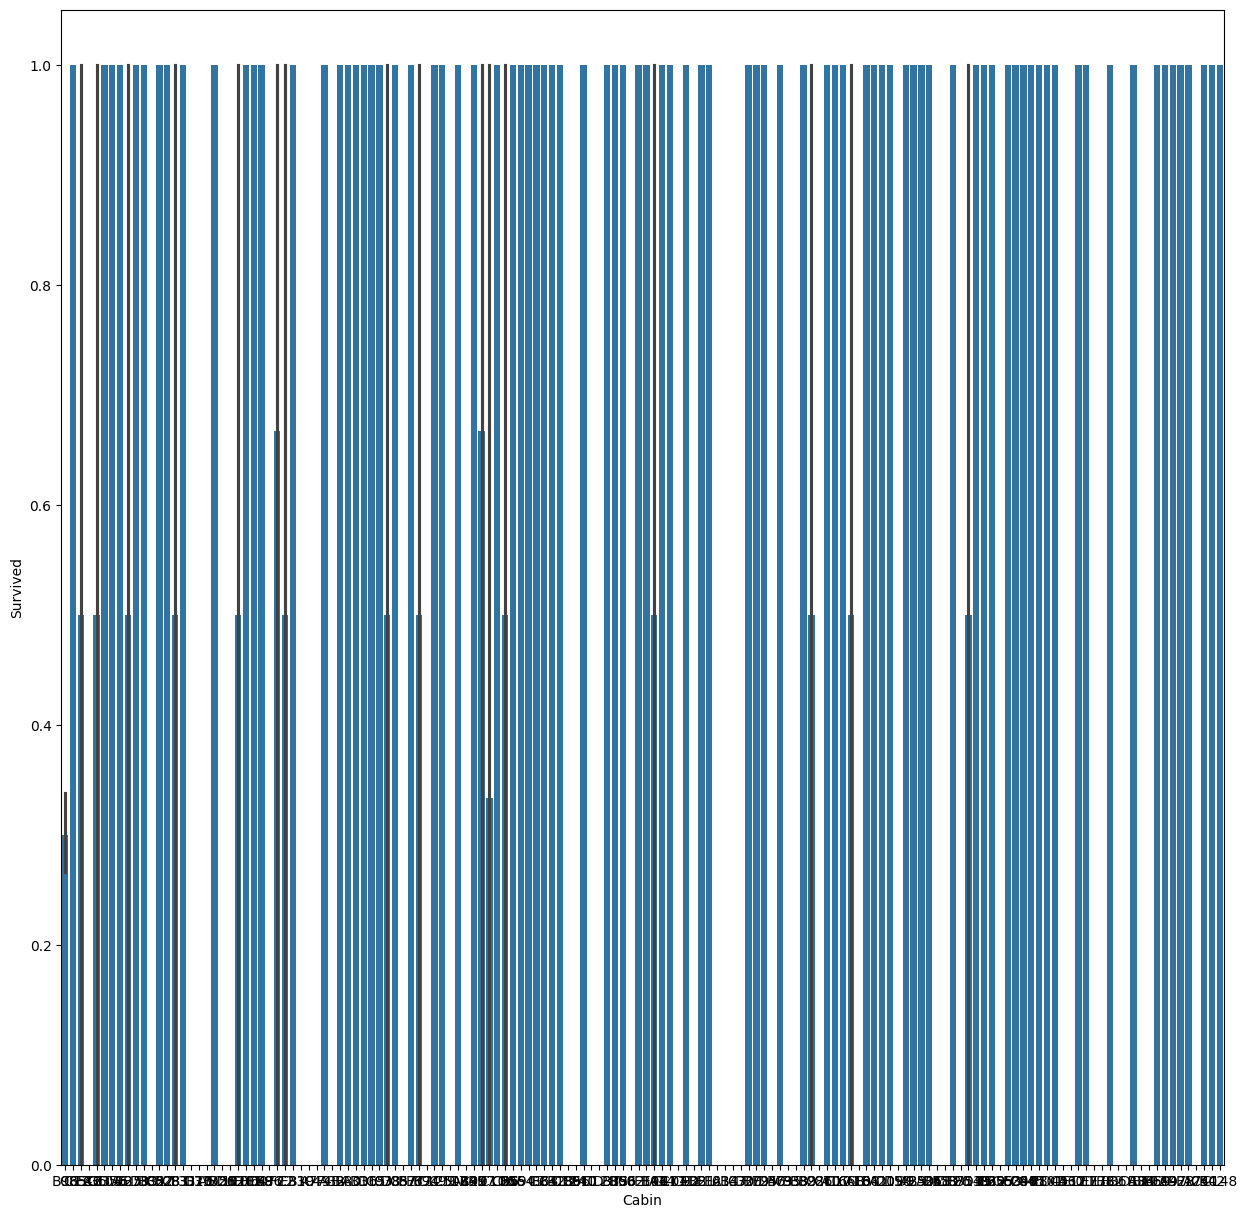

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x='Cabin',y='Survived',data=data)
plt.show()

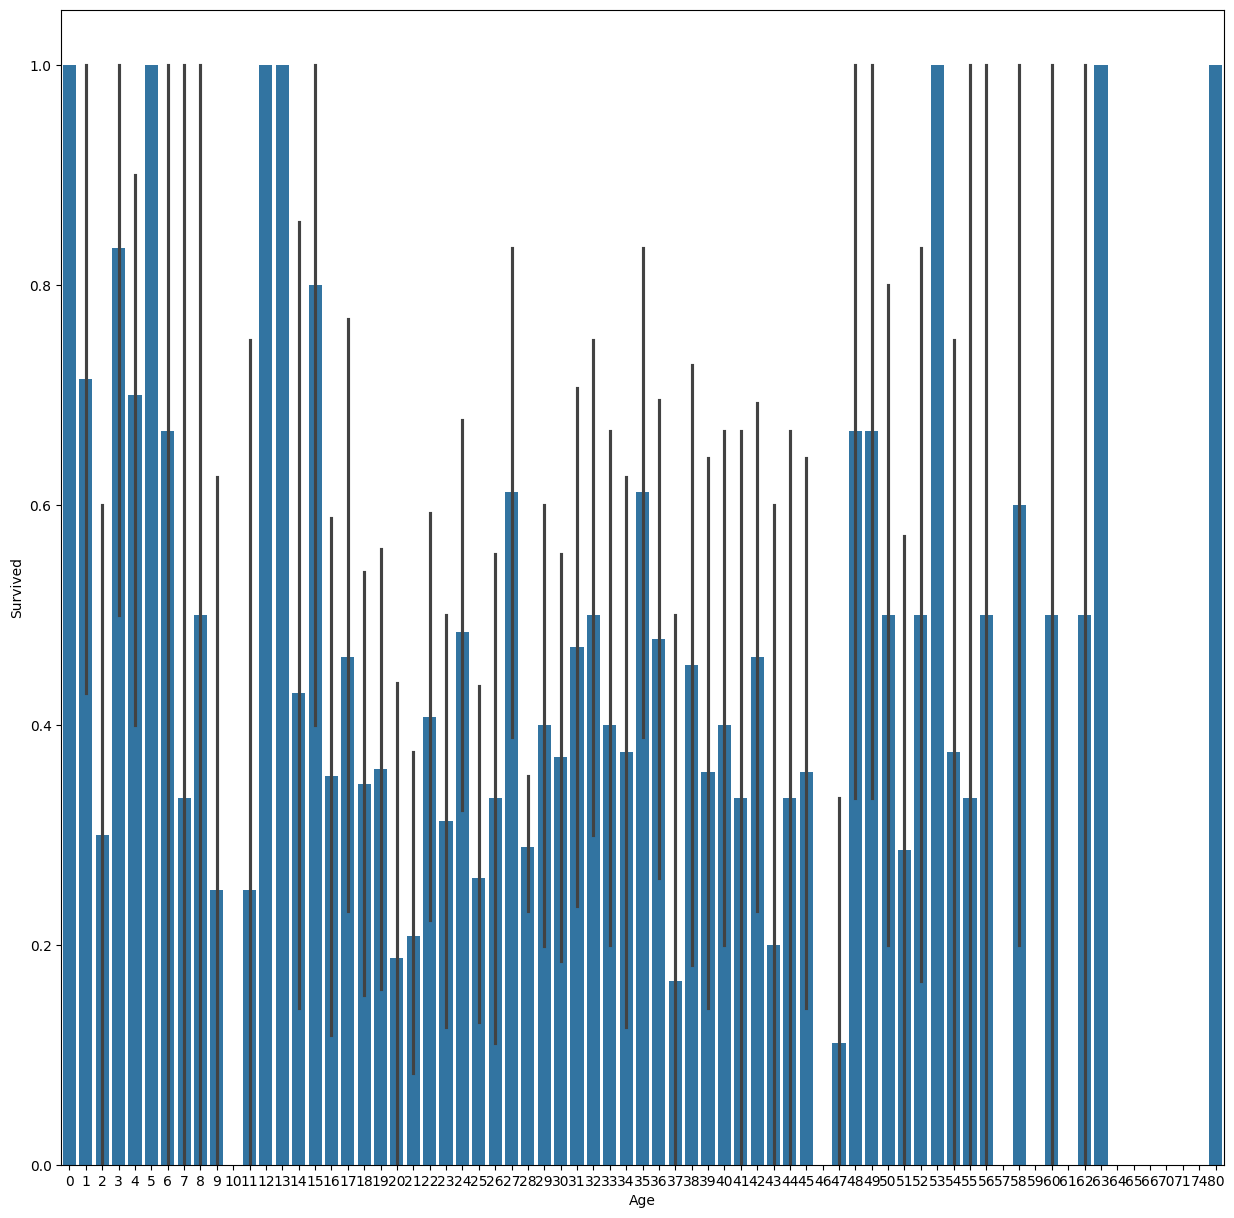

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x='Age',y='Survived',data=data)
plt.show()

<ipython-input-20-17eaf23a768b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, hue='Sex', ci=None, order=[1,0])


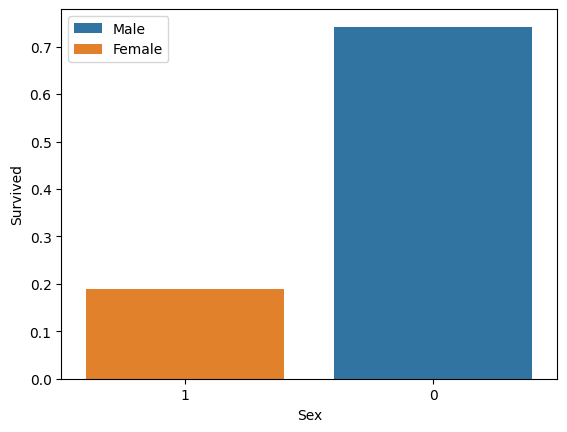

In [ ]:
sns.barplot(x='Sex', y='Survived', data=data, hue='Sex', ci=None, order=[1,0])
plt.legend(labels=['Male','Female'])
plt.show()